Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit

# Startsups.csv

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sn

In [3]:
startup =pd.read_csv("D:\BCA\Data Science Excelr\Assignments\A5_Multiple linear Regression\Startups.csv")

In [4]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
start=startup.rename(columns= {'R&D Spend' : 'RD','Administration' : 'ADMN','Marketing Spend' :'MS'})

In [6]:
start.head()

,RD,ADMN,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
start.describe()

,RD,ADMN,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Correlation

In [8]:
start.corr()

,RD,ADMN,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
ADMN,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatter Plot

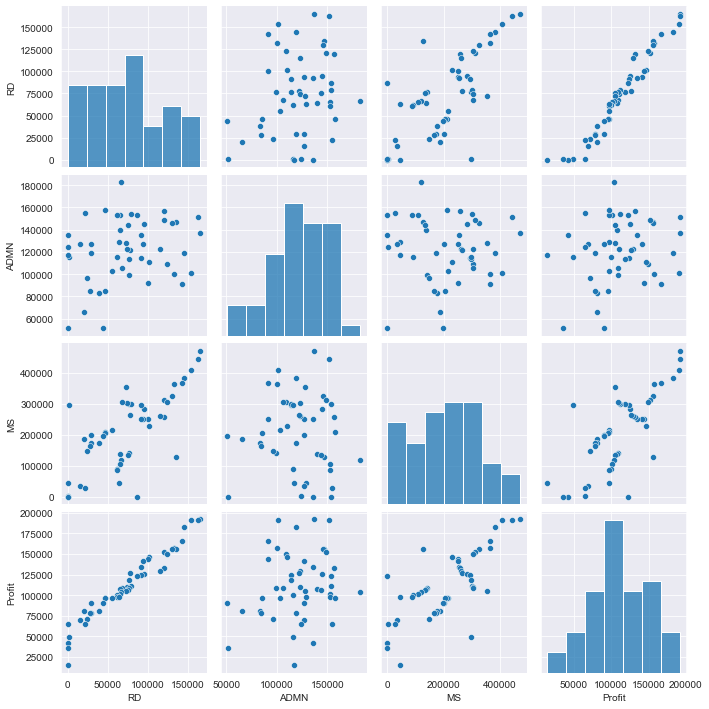

In [9]:
sn.set_style(style="darkgrid")
sn.pairplot(start)

In [10]:
#bulid model
model=smf.ols('Profit~RD+ADMN+MS',data=start).fit()

In [11]:
#coificient and slope of the line
model.params

Intercept    50122.192990
RD               0.805715
ADMN            -0.026816
MS               0.027228
dtype: float64

In [12]:
model.tvalues,'\n',model.pvalues

(Intercept     7.626218
 RD           17.846374
 ADMN         -0.525507
 MS            1.655077
 dtype: float64,
 '\n',
 Intercept    1.057379e-09
 RD           2.634968e-22
 ADMN         6.017551e-01
 MS           1.047168e-01
 dtype: float64)

In [13]:
print(model.rsquared,model.rsquared_adj)

0.9507459940683246 0.9475337762901719


In [14]:
model1=smf.ols('Profit~RD',data=start).fit()
model1.pvalues

Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64

In [15]:
model2=smf.ols('Profit~MS',data=start).fit()
model2.pvalues

Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64

In [16]:
model3=smf.ols('Profit~RD+MS',data=start).fit()
model3.pvalues

Intercept    3.504062e-22
RD           6.040433e-24
MS           6.003040e-02
dtype: float64

In [17]:
rsq_rd=smf.ols('RD~ADMN+MS',data=start).fit().rsquared
vif_rd=1/(1-rsq_rd)

In [18]:
rsq_adms=smf.ols('ADMN~RD+MS',data=start).fit().rsquared
vif_adms=1/(1-rsq_adms)

In [19]:
rsq_ms=smf.ols('MS~ADMN+RD',data=start).fit().rsquared
vif_ms=1/(1-rsq_ms)

In [20]:
d1={'Variables':['RD','ADMN','MS'],'Vif':[vif_rd,vif_adms,vif_ms]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RD,2.468903
1,ADMN,1.175091
2,MS,2.326773


In [21]:
#chech for resudial
import statsmodels.api as sm
import matplotlib.pyplot as plt

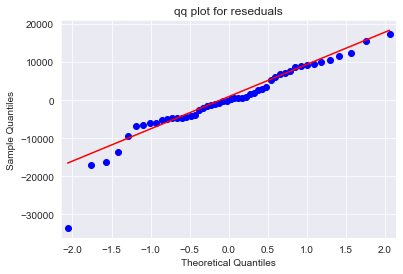

In [22]:
qqplot=sm.qqplot(model.resid,line="q")
plt.title("qq plot for reseduals")
plt.show()

In [23]:
list(np.where(model.resid <-20000))

[array([49], dtype=int64)]

In [24]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

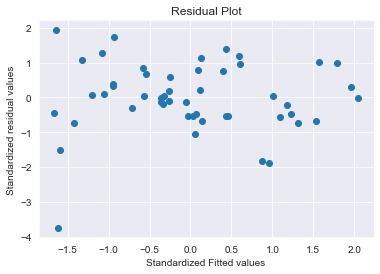

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# residual vs regressor

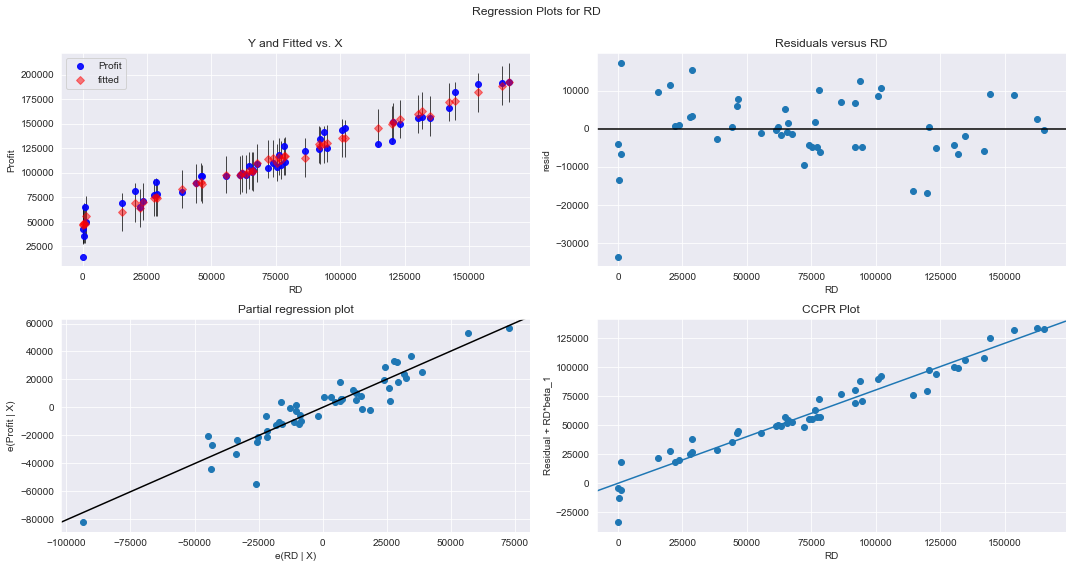

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

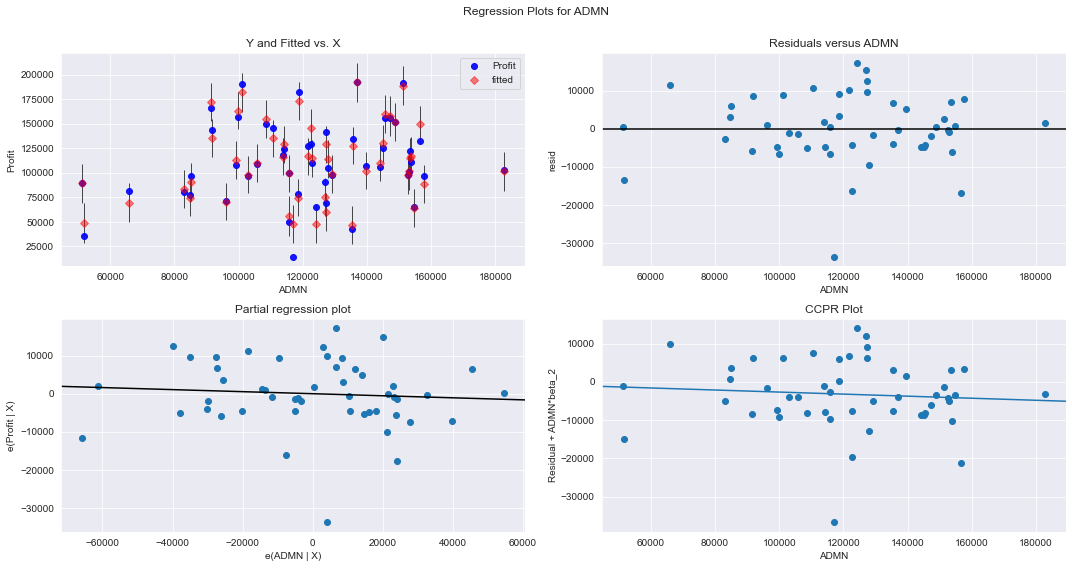

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADMN", fig=fig)
plt.show()

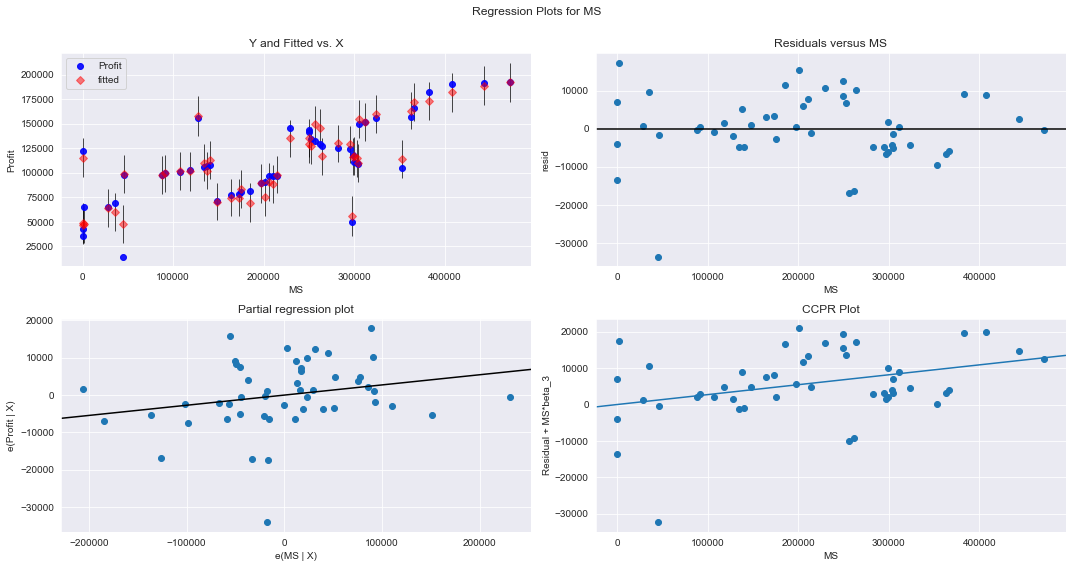

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

# cook distance

In [30]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

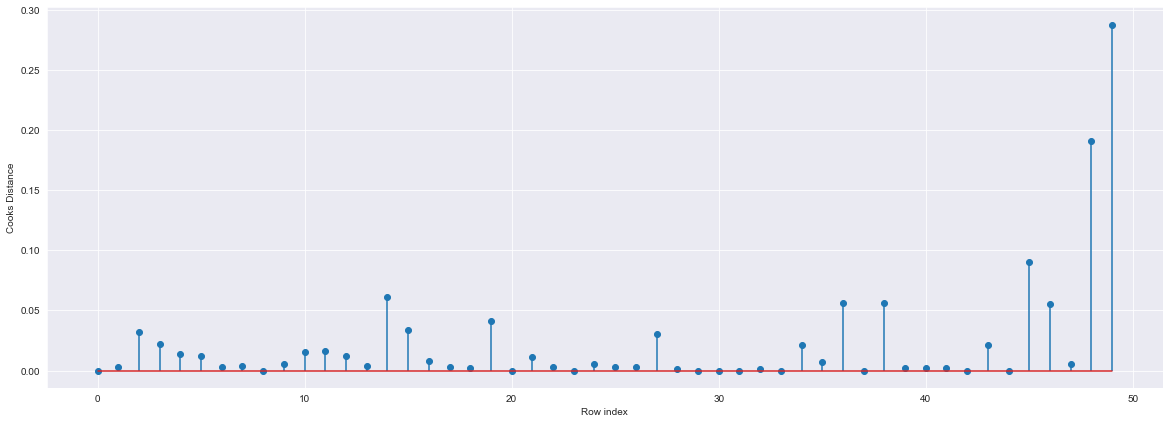

In [31]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(start)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

# high influence point

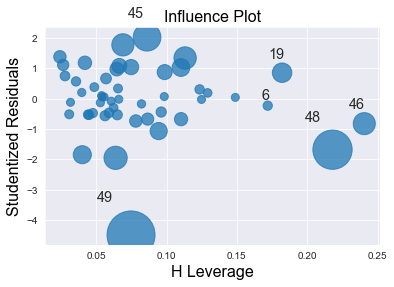

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [33]:
k = start.shape[1]
n = start.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [34]:
leverage_cutoff

0.36

In [35]:
start[start.index.isin([49])]

,RD,ADMN,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# improving model

In [37]:
start_new=start.copy()
start_new.head()

,RD,ADMN,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [38]:
start1=start_new.drop(start_new.index[49],axis=0).reset_index(drop=True)
start1.head()

,RD,ADMN,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [39]:
final_model=smf.ols('Profit~RD+ADMN+MS',data=start1).fit()
final_model.rsquared 

0.9613162435129847

# model prediction

In [40]:
new_data=pd.DataFrame({'RD':70000,"ADMN":90000,"MS":140000},index=[0])
new_data

,RD,ADMN,MS
0,70000,90000,140000


In [41]:
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [42]:
pred_y=final_model.predict(start1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# Toyota corolla.csv

Consider only the below columns and prepare a prediction model for predicting Price

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [45]:
tc=pd.read_csv("D:\BCA\Data Science Excelr\Assignments\A5_Multiple linear Regression\ToyotaCorolla.csv")

In [46]:
tc.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# Showing all rows and columns

In [47]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
tc.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [48]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [51]:
tc1=tc[['Price','Age_08_04','KM','HP','Doors','Gears','Weight']]

In [52]:
tc1.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [55]:
tc1.rename(columns={'Age_08_04':'age'},inplace=True)

In [57]:
tc2 = tc1

In [58]:
tc2.describe()

,Price,age,KM,HP,Doors,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,4.033426,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,2.000000,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,4.000000,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,5.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,6.000000,1615.00000


In [59]:
tc2.corr()

,Price,age,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,0.063104,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,0.020613,1.000000


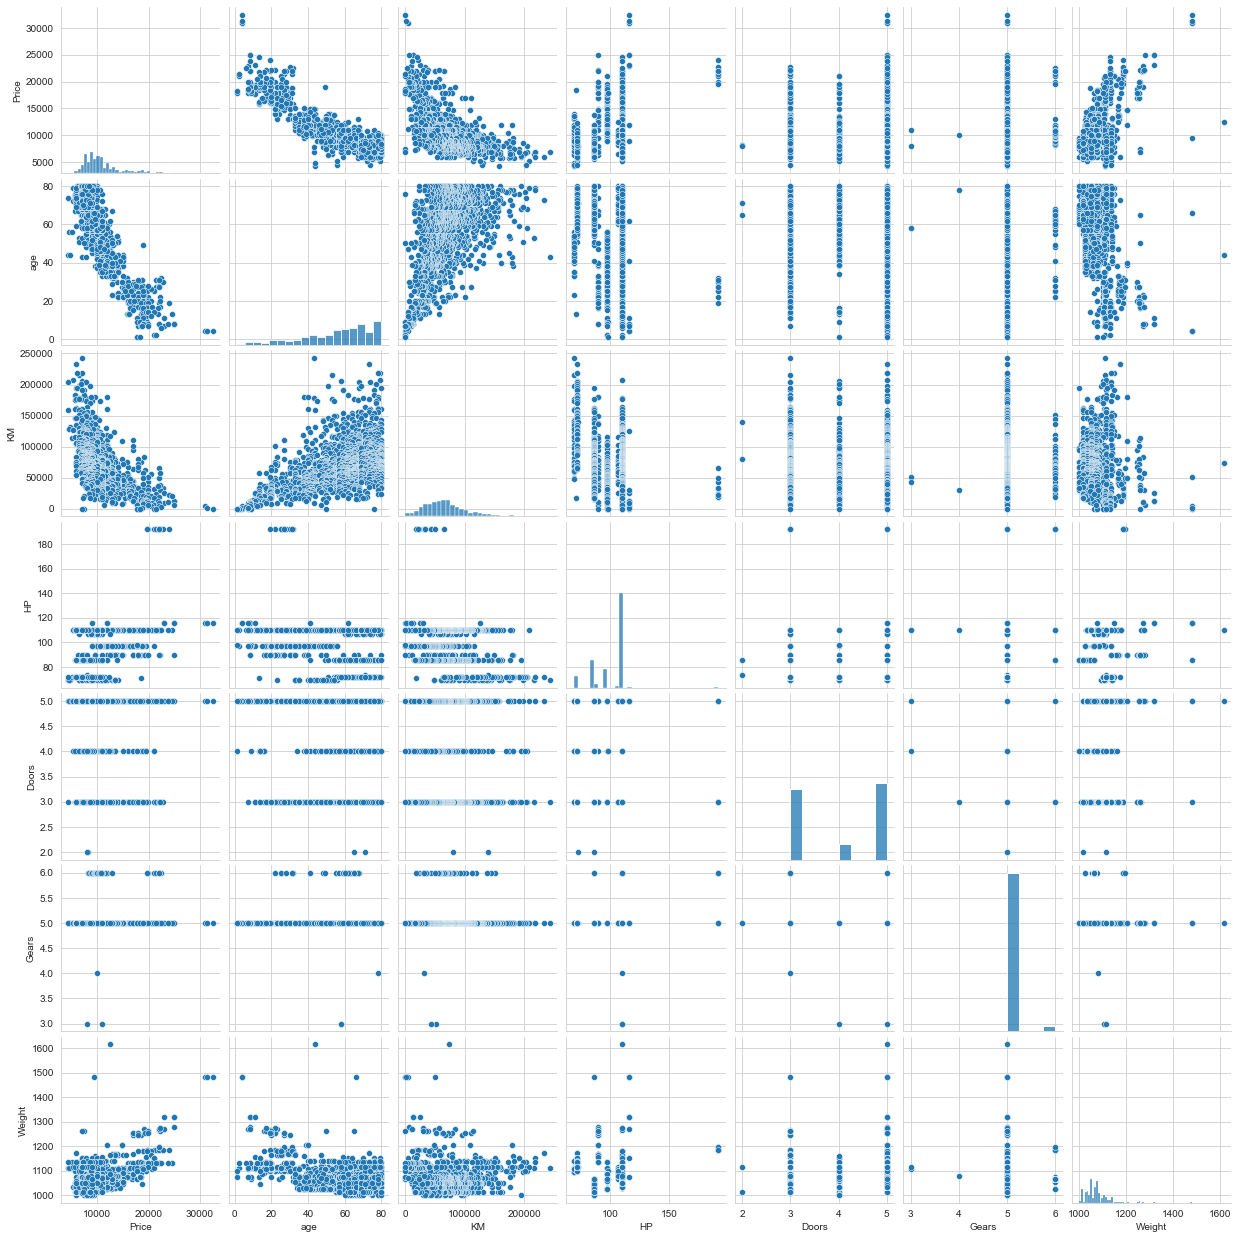

In [60]:
sns.set_style("whitegrid")
sns.pairplot(tc2)

In [61]:
import statsmodels.formula.api as smf
model=smf.ols('Price~age+KM+HP+Doors+Gears+Weight',data=tc2).fit()

In [62]:
model.params

Intercept   -6984.373566
age          -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Gears         622.282925
Weight         18.609651
dtype: float64

In [63]:
model.tvalues,"\n",model.pvalues

(Intercept    -5.323309
 age         -46.728942
 KM          -16.542560
 HP           10.842418
 Doors        -0.242055
 Gears         3.152234
 Weight       22.446903
 dtype: float64,
 '\n',
 Intercept     1.181900e-07
 age          4.387432e-290
 KM            2.238900e-56
 HP            2.231791e-26
 Doors         8.087723e-01
 Gears         1.653931e-03
 Weight        7.856458e-96
 dtype: float64)

In [64]:
print(model.rsquared,model.rsquared_adj)

0.8628024511073656 0.8622263942190831


In [65]:
rsq_age = smf.ols('age~KM+HP+Doors+Gears+Weight',data=tc2).fit().rsquared  
vif_age = 1/(1-rsq_age)

In [66]:
rsq_km = smf.ols('KM~age+HP+Doors+Gears+Weight',data=tc2).fit().rsquared  
vif_km = 1/(1-rsq_km)

In [67]:
rsq_hp = smf.ols('HP~KM+age+Doors+Gears+Weight',data=tc2).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

In [68]:
rsq_d = smf.ols('Doors~KM+HP+age+Gears+Weight',data=tc2).fit().rsquared  
vif_d = 1/(1-rsq_d)

In [69]:
rsq_g = smf.ols('Gears~KM+HP+Doors+age+Weight',data=tc2).fit().rsquared  
vif_g = 1/(1-rsq_g)

In [70]:
rsq_w = smf.ols('Weight~KM+HP+Doors+Gears+age',data=tc2).fit().rsquared  
vif_w = 1/(1-rsq_w)

In [71]:
d1 = {'Variables':['age','KM','HP','Doors','Gear','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_d,vif_g,vif_w]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,age,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Gear,1.096501
5,Weight,1.508041


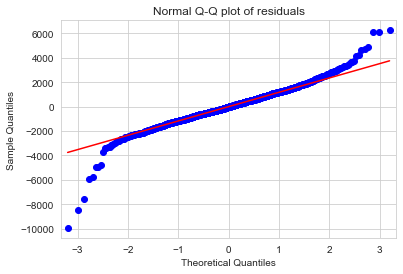

In [72]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [73]:
list(np.where(model.resid>6000))

[array([109, 147, 523], dtype=int64)]

In [74]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [75]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

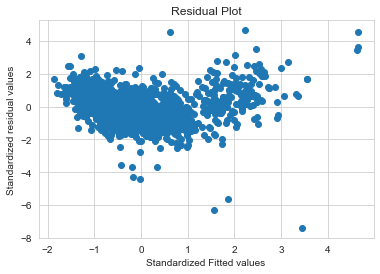

In [76]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

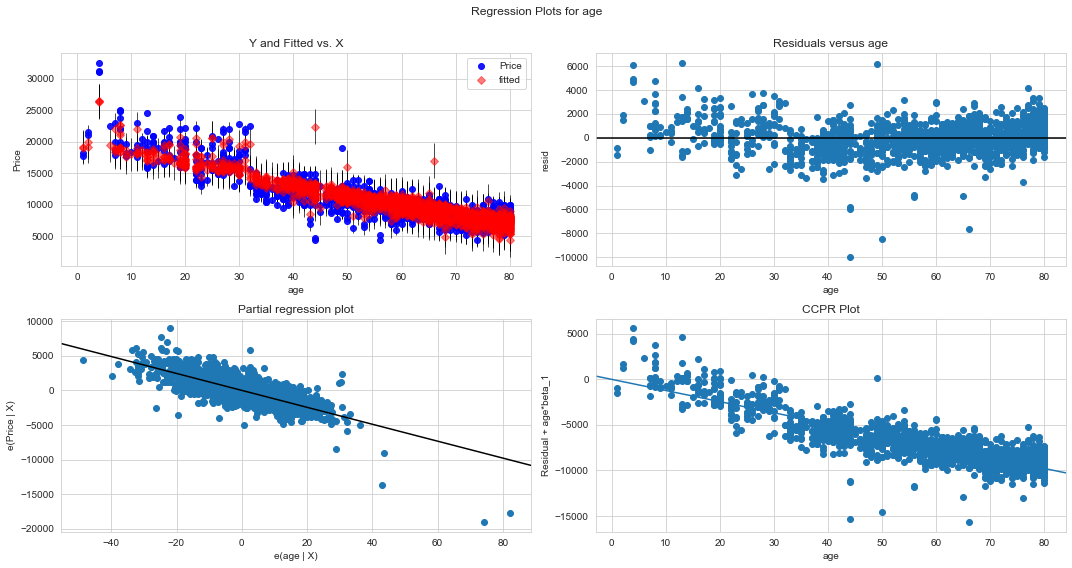

In [77]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)
plt.show()

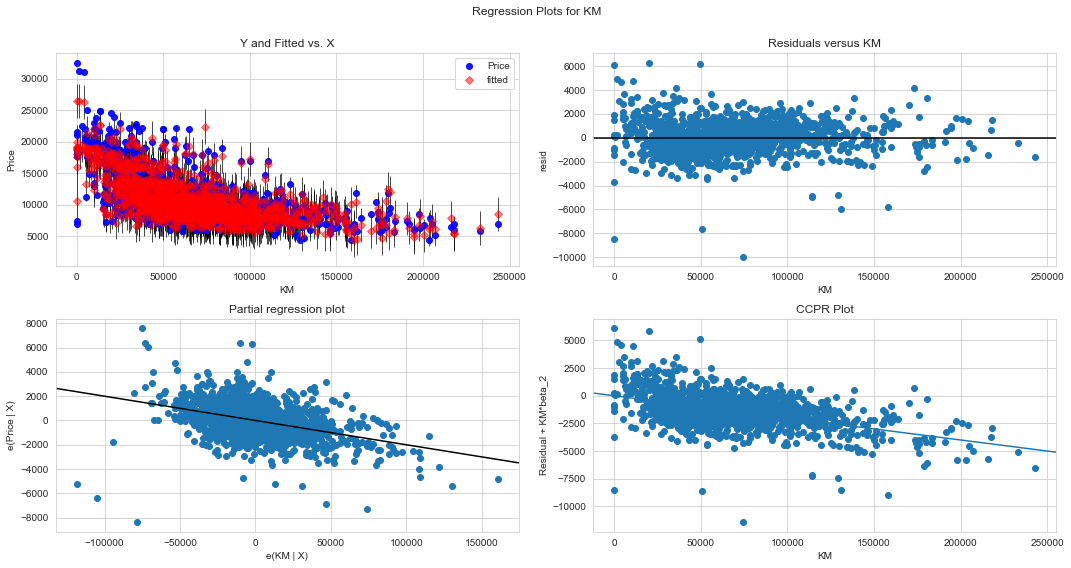

In [78]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

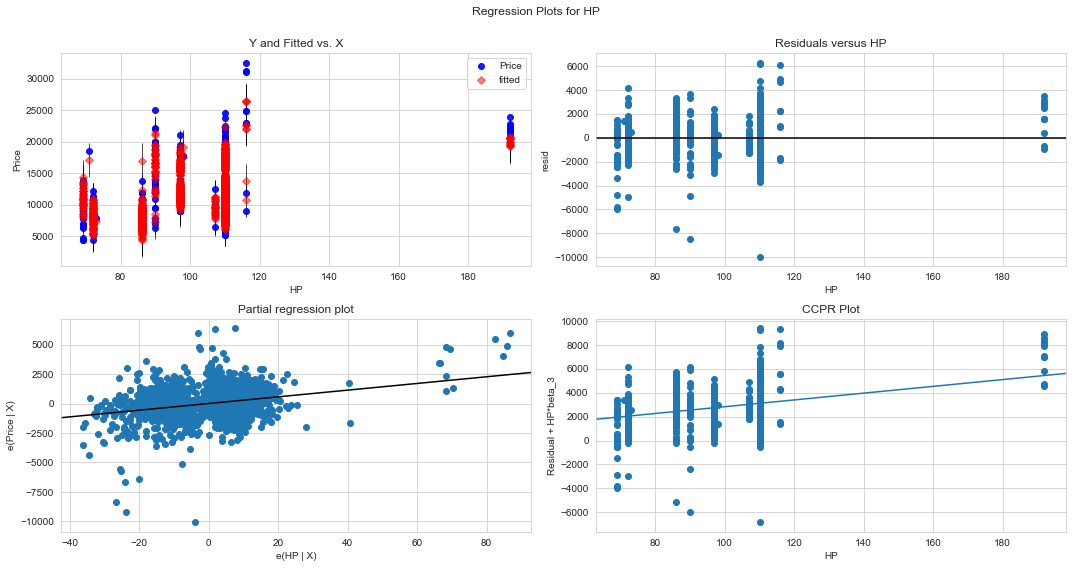

In [79]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

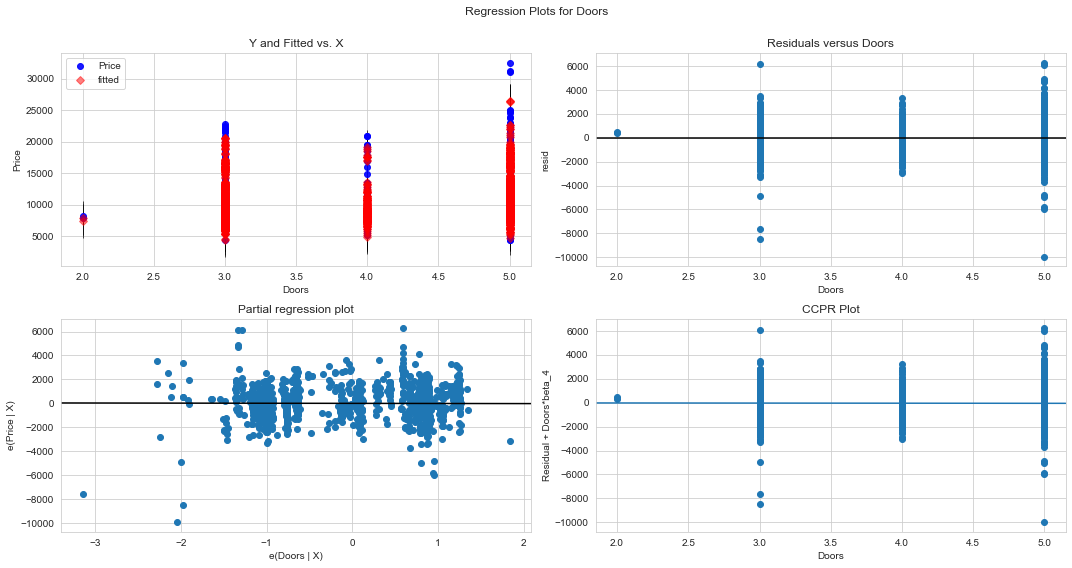

In [80]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

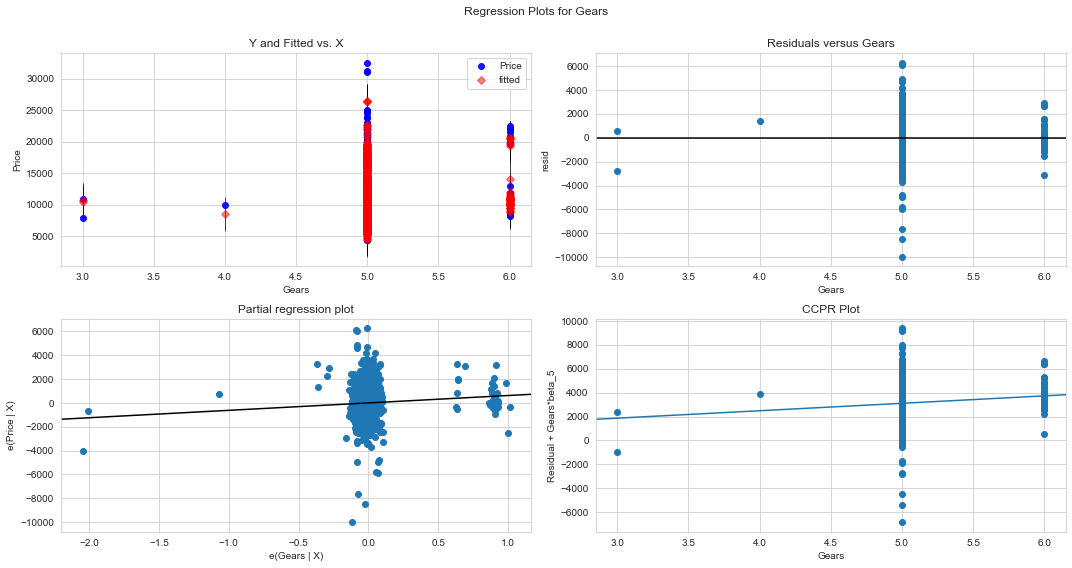

In [81]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

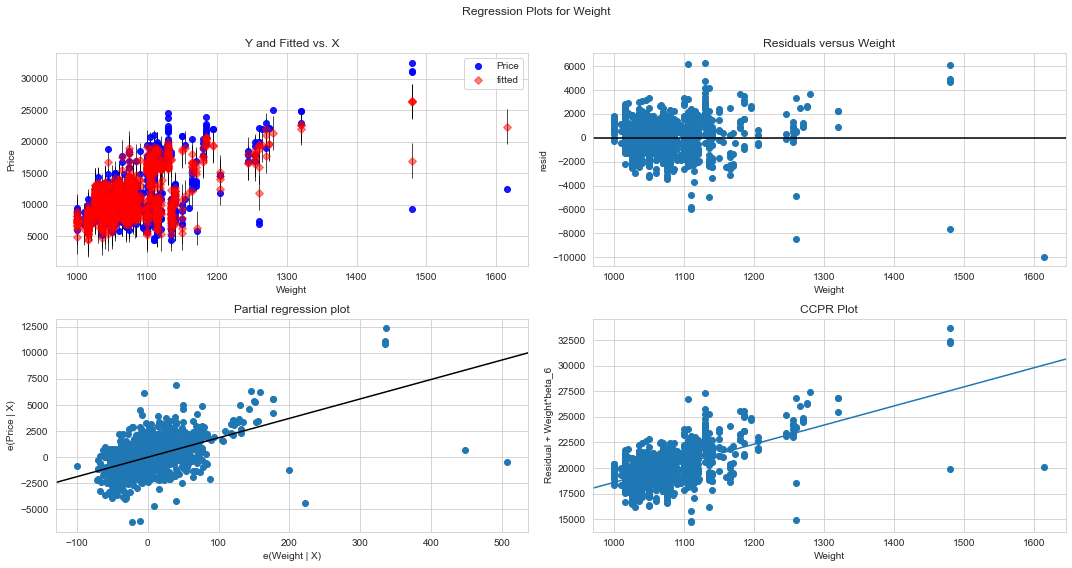

In [82]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [83]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

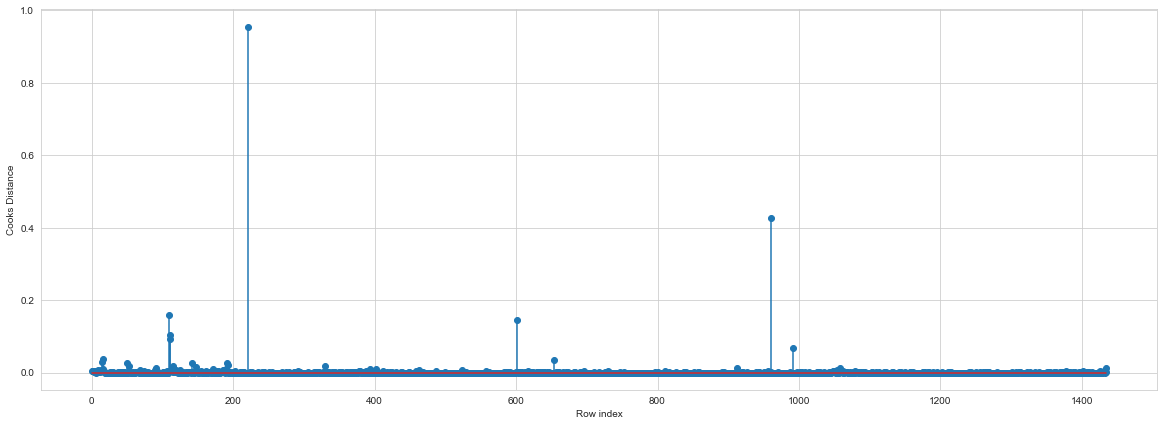

In [84]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [85]:
np.argmax(c) , np.max(c)

(221, 0.95531514386949)

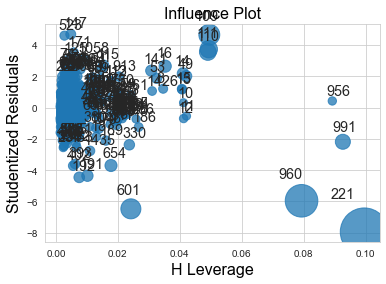

In [86]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [87]:
k = tc2.shape[1]
n = tc2.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [88]:
leverage_cutoff

0.016713091922005572

In [89]:
tc2[tc2.index.isin([959,220])]

,Price,age,KM,HP,Doors,Gears,Weight
220,11950,43,74285,110,5,5,1075
959,8895,61,50925,110,5,5,1070


# improving model

In [91]:
tc3=tc2.copy()
tc3.head()

,Price,age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [92]:
tc4=tc3.drop(tc3.index[[959,220,109, 146,600,522]],axis=0).reset_index(drop=True)
tc4

,Price,age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
5,12950,32,61000,90,3,5,1170
6,16900,27,94612,90,3,5,1245
7,18600,30,75889,90,3,5,1245
8,21500,27,19700,192,3,5,1185
9,12950,23,71138,69,3,5,1105


In [93]:
final_model=smf.ols('Price~age+KM+HP+Doors+Gears+Weight',data=tc4).fit()
final_model.rsquared 

0.8615913788208506

In [ ]:
model prediction